# Review of date and time

In [1]:
import pandas as pd
sp500 = pd.read_csv('sp500.csv')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [2]:
sp500.head()

,Date,Open,High,Low,Close,Volume
0,NaN,4703.96,4740.74,4703.96,4725.79,2194630000
1,"Dec. 22, 2021",4650.36,4697.67,4645.53,4696.56,2439570000
2,"Dec. 21, 2021",4594.96,4651.14,4583.16,4649.23,2564370000
3,"Dec. 20, 2021",4587.90,4587.90,4531.10,4568.02,3395780000
4,"Dec. 17, 2021",4652.50,4666.70,4600.22,4620.64,5609780000


In [3]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
# pd.to_datetime(sp500['Date'], format='%b. %d, %Y')
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
sp500['Date']

0             NaT
1      2021-12-22
2      2021-12-21
3      2021-12-20
4      2021-12-17
          ...    
1253   2017-01-03
1254   2016-12-30
1255   2016-12-29
1256   2016-12-28
1257   2016-12-27
Name: Date, Length: 1258, dtype: datetime64[ns]

In [4]:
sp500 = sp500.dropna()

In [5]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 1 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Open    1257 non-null   float64       
 2   High    1257 non-null   float64       
 3   Low     1257 non-null   float64       
 4   Close   1257 non-null   float64       
 5   Volume  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.7 KB


In [6]:
sp500['Date'].min()

Timestamp('2016-12-27 00:00:00')

In [7]:
sp500['Date'].max()

Timestamp('2021-12-22 00:00:00')

In [8]:
sp500['Date'].max() - sp500['Date'].min()

Timedelta('1821 days 00:00:00')

In [9]:
(sp500['Date'].max() - sp500['Date'].min())/pd.Timedelta(days=365)

4.989041095890411

In [10]:
pd.Timestamp('2021-01-01')

Timestamp('2021-01-01 00:00:00')

In [11]:
sp500['Date'].max() - pd.Timestamp('2021-01-01')

Timedelta('355 days 00:00:00')

In [12]:
sp500['year'] = sp500['Date'].dt.year
sp500['month'] = sp500['Date'].dt.month
sp500['day'] = sp500['Date'].dt.day
sp500['day_name'] = sp500['Date'].dt.day_name()

In [13]:
sp500

,Date,Open,High,Low,Close,Volume,year,month,day,day_name
1,2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday
2,2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
3,2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
4,2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
5,2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
...,...,...,...,...,...,...,...,...,...,...
1253,2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday
1254,2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
1255,2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
1256,2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday


# Manipulating datetime as index

In [14]:
sp500.head()

,Date,Open,High,Low,Close,Volume,year,month,day,day_name
1,2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday
2,2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
3,2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
4,2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
5,2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday


In [15]:
sp500 = sp500.set_index('Date')

In [16]:
sp500.head()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday
2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday


In [17]:
sp500.index

DatetimeIndex(['2021-12-22', '2021-12-21', '2021-12-20', '2021-12-17',
               '2021-12-16', '2021-12-15', '2021-12-14', '2021-12-13',
               '2021-12-10', '2021-12-09',
               ...
               '2017-01-10', '2017-01-09', '2017-01-06', '2017-01-05',
               '2017-01-04', '2017-01-03', '2016-12-30', '2016-12-29',
               '2016-12-28', '2016-12-27'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [18]:
sp500 = sp500.sort_index()

In [19]:
sp500

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday
...,...,...,...,...,...,...,...,...,...
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday


In [20]:
sp500.loc['2021-12-22']

Open           4650.36
High           4697.67
Low            4645.53
Close          4696.56
Volume      2439570000
year              2021
month               12
day                 22
day_name     Wednesday
Name: 2021-12-22 00:00:00, dtype: object

In [21]:
sp500.loc['2021-12-01': '2021-12-31']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-12-01,4602.82,4652.94,4510.27,4513.04,4078260000,2021,12,1,Wednesday
2021-12-02,4504.73,4595.46,4504.73,4577.10,3771510000,2021,12,2,Thursday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-06,4548.37,4612.60,4540.51,4591.67,3305690000,2021,12,6,Monday
2021-12-07,4631.97,4694.04,4631.97,4686.75,3334320000,2021,12,7,Tuesday
2021-12-08,4690.86,4705.06,4674.52,4701.21,3061550000,2021,12,8,Wednesday
2021-12-09,4691.00,4695.26,4665.98,4667.45,2851660000,2021,12,9,Thursday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-13,4710.30,4710.30,4667.60,4668.97,3322050000,2021,12,13,Monday


In [22]:
sp500.loc['2021-12']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-12-01,4602.82,4652.94,4510.27,4513.04,4078260000,2021,12,1,Wednesday
2021-12-02,4504.73,4595.46,4504.73,4577.10,3771510000,2021,12,2,Thursday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-06,4548.37,4612.60,4540.51,4591.67,3305690000,2021,12,6,Monday
2021-12-07,4631.97,4694.04,4631.97,4686.75,3334320000,2021,12,7,Tuesday
2021-12-08,4690.86,4705.06,4674.52,4701.21,3061550000,2021,12,8,Wednesday
2021-12-09,4691.00,4695.26,4665.98,4667.45,2851660000,2021,12,9,Thursday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-13,4710.30,4710.30,4667.60,4668.97,3322050000,2021,12,13,Monday


In [23]:
sp500.loc['2021-11': '2021-12']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-11-01,4610.62,4620.34,4595.06,4613.67,2924000000,2021,11,1,Monday
2021-11-02,4613.34,4635.15,4613.34,4630.65,3309690000,2021,11,2,Tuesday
2021-11-03,4630.65,4663.46,4621.19,4660.57,3339440000,2021,11,3,Wednesday
2021-11-04,4662.93,4683.00,4662.59,4680.06,3332940000,2021,11,4,Thursday
2021-11-05,4699.26,4718.50,4681.32,4697.53,3491150000,2021,11,5,Friday
2021-11-08,4701.48,4714.92,4694.39,4701.70,3465720000,2021,11,8,Monday
2021-11-09,4707.25,4708.53,4670.87,4685.25,3110230000,2021,11,9,Tuesday
2021-11-10,4670.26,4684.85,4630.86,4646.71,3581630000,2021,11,10,Wednesday
2021-11-11,4659.39,4664.55,4648.31,4649.27,2623140000,2021,11,11,Thursday


In [24]:
sp500.loc['2021']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-01-04,3764.61,3769.99,3662.71,3700.65,5006680000,2021,1,4,Monday
2021-01-05,3698.02,3737.83,3695.07,3726.86,4582620000,2021,1,5,Tuesday
2021-01-06,3712.20,3783.04,3705.34,3748.14,6049970000,2021,1,6,Wednesday
2021-01-07,3764.71,3811.55,3764.71,3803.79,5080870000,2021,1,7,Thursday
2021-01-08,3815.05,3826.69,3783.60,3824.68,4764180000,2021,1,8,Friday
...,...,...,...,...,...,...,...,...,...
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday


In [25]:
sp500.loc['2021-01': '2021-02-02']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-01-04,3764.61,3769.99,3662.71,3700.65,5006680000,2021,1,4,Monday
2021-01-05,3698.02,3737.83,3695.07,3726.86,4582620000,2021,1,5,Tuesday
2021-01-06,3712.20,3783.04,3705.34,3748.14,6049970000,2021,1,6,Wednesday
2021-01-07,3764.71,3811.55,3764.71,3803.79,5080870000,2021,1,7,Thursday
2021-01-08,3815.05,3826.69,3783.60,3824.68,4764180000,2021,1,8,Friday
2021-01-11,3803.14,3817.86,3789.02,3799.61,4450500000,2021,1,11,Monday
2021-01-12,3801.62,3810.78,3776.51,3801.19,4977210000,2021,1,12,Tuesday
2021-01-13,3802.23,3820.96,3791.50,3809.84,4590420000,2021,1,13,Wednesday
2021-01-14,3814.98,3823.60,3792.86,3795.54,5180140000,2021,1,14,Thursday


<AxesSubplot:xlabel='Date'>

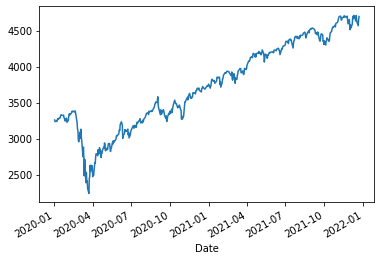

In [26]:
sp500.loc['2020':, 'Close'].plot()

# Resampling frequency: downsampling

In [27]:
sp500.head(10)

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday
2017-01-04,2261.60,2272.82,2261.60,2270.75,3764890000,2017,1,4,Wednesday
2017-01-05,2268.18,2271.50,2260.45,2269.00,3761820000,2017,1,5,Thursday
2017-01-06,2271.14,2282.10,2264.06,2276.98,3339890000,2017,1,6,Friday
2017-01-09,2273.59,2275.49,2268.90,2268.90,3217610000,2017,1,9,Monday


### `asfreq`

In [28]:
sp500.asfreq(freq='1W')
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
sp500_1w_asfreq = sp500.asfreq('1W-FRI')

In [30]:
sp500_1w_asfreq

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-30,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2017-01-06,2271.14,2282.10,2264.06,2276.98,3.339890e+09,2017.0,1.0,6.0,Friday
2017-01-13,2272.74,2278.68,2271.51,2274.64,3.081270e+09,2017.0,1.0,13.0,Friday
2017-01-20,2269.96,2276.96,2265.01,2271.31,3.524970e+09,2017.0,1.0,20.0,Friday
2017-01-27,2299.02,2299.02,2291.62,2294.69,3.135890e+09,2017.0,1.0,27.0,Friday
...,...,...,...,...,...,...,...,...,...
2021-11-19,4708.44,4717.75,4694.22,4697.96,3.265600e+09,2021.0,11.0,19.0,Friday
2021-11-26,4664.63,4664.63,4585.43,4594.62,2.676740e+09,2021.0,11.0,26.0,Friday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3.971500e+09,2021.0,12.0,3.0,Friday


In [31]:
sp500_1w_asfreq[sp500_1w_asfreq['Close'].isna()]

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2017-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sp500_1w_asfreq = sp500.asfreq('1W-FRI', method='bfill')

In [33]:
sp500_1w_asfreq.loc['2020-12']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2020-12-04,3670.94,3699.20,3670.94,3699.12,5086370000,2020,12,4,Friday
2020-12-11,3656.08,3665.91,3633.40,3663.46,4367150000,2020,12,11,Friday
2020-12-18,3722.39,3726.70,3685.84,3709.41,7068340000,2020,12,18,Friday
2020-12-25,3723.03,3740.51,3723.03,3735.36,3527460000,2020,12,28,Monday


In [34]:
sp500_1w_asfreq = sp500.asfreq('1W-FRI', method='ffill')
sp500_1w_asfreq.loc['2020-12']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2020-12-04,3670.94,3699.20,3670.94,3699.12,5086370000,2020,12,4,Friday
2020-12-11,3656.08,3665.91,3633.40,3663.46,4367150000,2020,12,11,Friday
2020-12-18,3722.39,3726.70,3685.84,3709.41,7068340000,2020,12,18,Friday
2020-12-25,3694.03,3703.82,3689.32,3703.06,1885090000,2020,12,24,Thursday


### `resample`

In [35]:
sp500.resample(rule='1W-FRI')

In [36]:
sp500_1w_resample = sp500.resample(rule='1W-FRI').last()

In [37]:
sp500_1w_resample.loc['2020-12']

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2020-12-04,3670.94,3699.20,3670.94,3699.12,5086370000,2020,12,4,Friday
2020-12-11,3656.08,3665.91,3633.40,3663.46,4367150000,2020,12,11,Friday
2020-12-18,3722.39,3726.70,3685.84,3709.41,7068340000,2020,12,18,Friday
2020-12-25,3694.03,3703.82,3689.32,3703.06,1885090000,2020,12,24,Thursday


In [38]:
sp500_1w_asfreq.tail()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-11-19,4708.44,4717.75,4694.22,4697.96,3265600000,2021,11,19,Friday
2021-11-26,4664.63,4664.63,4585.43,4594.62,2676740000,2021,11,26,Friday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday


In [39]:
sp500_1w_resample.tail()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-11-26,4664.63,4664.63,4585.43,4594.62,2676740000,2021,11,26,Friday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-24,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday


In [40]:
sp500.tail()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday


In [41]:
sp500_1w_resample.loc[:'2021-12-17'].compare(sp500_1w_asfreq)

Date


In [42]:
sp500_1w_resample.head()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-06,2271.14,2282.10,2264.06,2276.98,3339890000,2017,1,6,Friday
2017-01-13,2272.74,2278.68,2271.51,2274.64,3081270000,2017,1,13,Friday
2017-01-20,2269.96,2276.96,2265.01,2271.31,3524970000,2017,1,20,Friday
2017-01-27,2299.02,2299.02,2291.62,2294.69,3135890000,2017,1,27,Friday


In [43]:
sp500['Open'].resample('1W-FRI').first()

Date
2016-12-30    2266.23
2017-01-06    2251.57
2017-01-13    2273.59
2017-01-20    2269.14
2017-01-27    2267.78
               ...   
2021-11-26    4712.00
2021-12-03    4628.75
2021-12-10    4548.37
2021-12-17    4710.30
2021-12-24    4587.90
Freq: W-FRI, Name: Open, Length: 261, dtype: float64

In [44]:
sp500_1w_resample['Open'] = sp500['Open'].resample('1W-FRI').first()

In [45]:
sp500['High'].resample('1W-FRI').max()

Date
2016-12-30    2273.82
2017-01-06    2282.10
2017-01-13    2279.27
2017-01-20    2276.96
2017-01-27    2300.99
               ...   
2021-11-26    4743.83
2021-12-03    4672.95
2021-12-10    4713.57
2021-12-17    4731.99
2021-12-24    4697.67
Freq: W-FRI, Name: High, Length: 261, dtype: float64

In [46]:
sp500.tail(8)

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2021-12-13,4710.30,4710.30,4667.60,4668.97,3322050000,2021,12,13,Monday
2021-12-14,4642.99,4660.47,4606.52,4634.09,3292740000,2021,12,14,Tuesday
2021-12-15,4636.46,4712.60,4611.22,4709.85,3367580000,2021,12,15,Wednesday
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday


In [47]:
sp500_1w_resample['High'] = sp500['High'].resample('1W-FRI').max()

In [48]:
sp500_1w_resample['Low'] = sp500['Low'].resample('1W-FRI').min()

In [49]:
sp500['Volume'].resample('1W-FRI').sum()

Date
2016-12-30     9386710000
2017-01-06    14637130000
2017-01-13    17020210000
2017-01-20    13591180000
2017-01-27    17555940000
                 ...     
2021-11-26    11775840000
2021-12-03    20242840000
2021-12-10    15411530000
2021-12-17    19184960000
2021-12-24     8399720000
Freq: W-FRI, Name: Volume, Length: 261, dtype: int64

In [50]:
sp500_1w_resample['Volume'] = sp500['Volume'].resample('1W-FRI').sum()

In [51]:
sp500_1w_resample

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-30,2266.23,2273.82,2233.62,2238.83,9386710000,2016,12,30,Friday
2017-01-06,2251.57,2282.10,2245.13,2276.98,14637130000,2017,1,6,Friday
2017-01-13,2273.59,2279.27,2254.25,2274.64,17020210000,2017,1,13,Friday
2017-01-20,2269.14,2276.96,2258.41,2271.31,13591180000,2017,1,20,Friday
2017-01-27,2267.78,2300.99,2257.02,2294.69,17555940000,2017,1,27,Friday
...,...,...,...,...,...,...,...,...,...
2021-11-26,4712.00,4743.83,4585.43,4594.62,11775840000,2021,11,26,Friday
2021-12-03,4628.75,4672.95,4495.12,4538.43,20242840000,2021,12,3,Friday
2021-12-10,4548.37,4713.57,4540.51,4712.02,15411530000,2021,12,10,Friday


In [52]:
sp500.resample('1W-FRI').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-30,2266.23,2273.82,2233.62,2238.83,9386710000
2017-01-06,2251.57,2282.10,2245.13,2276.98,14637130000
2017-01-13,2273.59,2279.27,2254.25,2274.64,17020210000
2017-01-20,2269.14,2276.96,2258.41,2271.31,13591180000
2017-01-27,2267.78,2300.99,2257.02,2294.69,17555940000
...,...,...,...,...,...
2021-11-26,4712.00,4743.83,4585.43,4594.62,11775840000
2021-12-03,4628.75,4672.95,4495.12,4538.43,20242840000
2021-12-10,4548.37,4713.57,4540.51,4712.02,15411530000


# Resampling frequency: upsampling

In [53]:
sp500.head()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday


In [54]:
sp500_1d_asfreq = sp500.asfreq('1D')

In [55]:
sp500_1d_asfreq.head(10)

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1.987080e+09,2016.0,12.0,27.0,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2.392360e+09,2016.0,12.0,28.0,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2.336370e+09,2016.0,12.0,29.0,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,2251.57,2263.88,2245.13,2257.83,3.770530e+09,2017.0,1.0,3.0,Tuesday
2017-01-04,2261.60,2272.82,2261.60,2270.75,3.764890e+09,2017.0,1.0,4.0,Wednesday


In [56]:
sp500.asfreq('1D', method='ffill').head(10)

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2016-12-31,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-01,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-02,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday
2017-01-04,2261.60,2272.82,2261.60,2270.75,3764890000,2017,1,4,Wednesday


In [57]:
sp500.asfreq('1D').fillna(method='ffill').head(10)

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1.987080e+09,2016.0,12.0,27.0,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2.392360e+09,2016.0,12.0,28.0,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2.336370e+09,2016.0,12.0,29.0,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2016-12-31,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2017-01-01,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2017-01-02,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3.770530e+09,2017.0,1.0,3.0,Tuesday
2017-01-04,2261.60,2272.82,2261.60,2270.75,3.764890e+09,2017.0,1.0,4.0,Wednesday


In [58]:
sp500.asfreq('1D').fillna(method='ffill').compare(sp500.asfreq('1D', method='ffill'))

Date


In [59]:
sp500.resample('1D').asfreq()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1.987080e+09,2016.0,12.0,27.0,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2.392360e+09,2016.0,12.0,28.0,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2.336370e+09,2016.0,12.0,29.0,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2.670900e+09,2016.0,12.0,30.0,Friday
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-20,4587.90,4587.90,4531.10,4568.02,3.395780e+09,2021.0,12.0,20.0,Monday


In [60]:
sp500.resample('1D').ffill()

,Open,High,Low,Close,Volume,year,month,day,day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2016-12-31,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
...,...,...,...,...,...,...,...,...,...
2021-12-18,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-19,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday


# Rolling/Shifting time windows

## `rolling`

In [61]:
sp500['Close']

Date
2016-12-27    2268.88
2016-12-28    2249.92
2016-12-29    2249.26
2016-12-30    2238.83
2017-01-03    2257.83
               ...   
2021-12-16    4668.67
2021-12-17    4620.64
2021-12-20    4568.02
2021-12-21    4649.23
2021-12-22    4696.56
Name: Close, Length: 1257, dtype: float64

In [62]:
sp500['Close'].rolling(window=3).mean() # min, std, sum, agg(['min', 'max'])
# https://pandas.pydata.org/pandas-docs/stable/reference/window.html#api-functions-rolling

Date
2016-12-27            NaN
2016-12-28            NaN
2016-12-29    2256.020000
2016-12-30    2246.003333
2017-01-03    2248.640000
                 ...     
2021-12-16    4670.870000
2021-12-17    4666.386667
2021-12-20    4619.110000
2021-12-21    4612.630000
2021-12-22    4637.936667
Name: Close, Length: 1257, dtype: float64

In [63]:
sp500['Close_3_mean'] = sp500['Close'].rolling(window=3).mean()

In [64]:
sp500[['Close', 'Close_3_mean']].head()

,Close,Close_3_mean
Date,,
2016-12-27,2268.88,NaN
2016-12-28,2249.92,NaN
2016-12-29,2249.26,2256.020000
2016-12-30,2238.83,2246.003333
2017-01-03,2257.83,2248.640000


In [65]:
sp500['Close'].loc[:'2016-12-29']

Date
2016-12-27    2268.88
2016-12-28    2249.92
2016-12-29    2249.26
Name: Close, dtype: float64

In [66]:
sp500['Close'].loc[:'2016-12-29'].mean()

2256.02

In [67]:
sp500['Close'].loc['2016-12-29':'2017-01-03'].mean()

2248.64

In [68]:
sp500['Close'].rolling(window=3, min_periods=1).mean()

Date
2016-12-27    2268.880000
2016-12-28    2259.400000
2016-12-29    2256.020000
2016-12-30    2246.003333
2017-01-03    2248.640000
                 ...     
2021-12-16    4670.870000
2021-12-17    4666.386667
2021-12-20    4619.110000
2021-12-21    4612.630000
2021-12-22    4637.936667
Name: Close, Length: 1257, dtype: float64

In [69]:
sp500['Close'].rolling(window=3, min_periods=2).mean()

Date
2016-12-27            NaN
2016-12-28    2259.400000
2016-12-29    2256.020000
2016-12-30    2246.003333
2017-01-03    2248.640000
                 ...     
2021-12-16    4670.870000
2021-12-17    4666.386667
2021-12-20    4619.110000
2021-12-21    4612.630000
2021-12-22    4637.936667
Name: Close, Length: 1257, dtype: float64

In [70]:
sp500['Close_3d_mean'] = sp500['Close'].rolling('3D').mean()

In [71]:
sp500[['Close', 'Close_3_mean', 'Close_3d_mean']]

,Close,Close_3_mean,Close_3d_mean
Date,,,
2016-12-27,2268.88,NaN,2268.880000
2016-12-28,2249.92,NaN,2259.400000
2016-12-29,2249.26,2256.020000,2256.020000
2016-12-30,2238.83,2246.003333,2246.003333
2017-01-03,2257.83,2248.640000,2257.830000
...,...,...,...
2021-12-16,4668.67,4670.870000,4670.870000
2021-12-17,4620.64,4666.386667,4666.386667
2021-12-20,4568.02,4619.110000,4568.020000


In [72]:
sp500['Close'].rolling(pd.Timedelta(days=3)).mean()

Date
2016-12-27    2268.880000
2016-12-28    2259.400000
2016-12-29    2256.020000
2016-12-30    2246.003333
2017-01-03    2257.830000
                 ...     
2021-12-16    4670.870000
2021-12-17    4666.386667
2021-12-20    4568.020000
2021-12-21    4608.625000
2021-12-22    4637.936667
Name: Close, Length: 1257, dtype: float64

## `shift`

In [73]:
sp500['Close']

Date
2016-12-27    2268.88
2016-12-28    2249.92
2016-12-29    2249.26
2016-12-30    2238.83
2017-01-03    2257.83
               ...   
2021-12-16    4668.67
2021-12-17    4620.64
2021-12-20    4568.02
2021-12-21    4649.23
2021-12-22    4696.56
Name: Close, Length: 1257, dtype: float64

In [74]:
sp500['Close'].shift()

Date
2016-12-27        NaN
2016-12-28    2268.88
2016-12-29    2249.92
2016-12-30    2249.26
2017-01-03    2238.83
               ...   
2021-12-16    4709.85
2021-12-17    4668.67
2021-12-20    4620.64
2021-12-21    4568.02
2021-12-22    4649.23
Name: Close, Length: 1257, dtype: float64

In [75]:
sp500['Close_previous'] = sp500['Close'].shift()

In [76]:
sp500['Close_previous_3'] = sp500['Close'].shift(periods=3)

In [77]:
sp500[['Close', 'Close_previous', 'Close_previous_3']]

,Close,Close_previous,Close_previous_3
Date,,,
2016-12-27,2268.88,NaN,NaN
2016-12-28,2249.92,2268.88,NaN
2016-12-29,2249.26,2249.92,NaN
2016-12-30,2238.83,2249.26,2268.88
2017-01-03,2257.83,2238.83,2249.92
...,...,...,...
2021-12-16,4668.67,4709.85,4668.97
2021-12-17,4620.64,4668.67,4634.09
2021-12-20,4568.02,4620.64,4709.85


In [78]:
sp500[['Close', 'Volume']].rolling('10D').mean().shift()

,Close,Volume
Date,,
2016-12-27,NaN,NaN
2016-12-28,2268.880000,1.987080e+09
2016-12-29,2259.400000,2.189720e+09
2016-12-30,2256.020000,2.238603e+09
2017-01-03,2251.722500,2.346678e+09
...,...,...
2021-12-16,4671.501250,3.174238e+09
2021-12-17,4681.126250,3.210128e+09
2021-12-20,4672.862500,3.494560e+09
